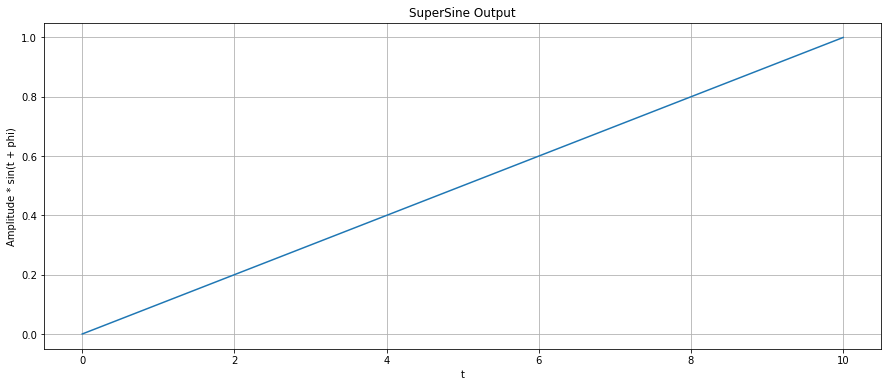

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
# SuperSine layer as defined before
class SuperSine(nn.Module):
    def __init__(self):
        super(SuperSine, self).__init__()

        self.a_a = nn.Parameter(torch.tensor(0.0, dtype=torch.float32))
        self.a_phi = nn.Parameter(torch.tensor(0.0, dtype=torch.float32))
        self.a_c = nn.Parameter(torch.tensor(0.0, dtype=torch.float32))
        self.a_t_coeff = nn.Parameter(torch.tensor(0.0, dtype=torch.float32))
        
        self.phi_a = nn.Parameter(torch.tensor(0.0, dtype=torch.float32))
        self.phi_phi = nn.Parameter(torch.tensor(0.0, dtype=torch.float32))
        self.phi_c = nn.Parameter(torch.tensor(0.0, dtype=torch.float32)) # i think this c lets you have just a vanilla phi, if phi_a and phi_t_coeff are 0
        self.phi_t_coeff = nn.Parameter(torch.tensor(0.0, dtype=torch.float32))
        
        self.t_coeff = nn.Parameter(torch.tensor(0.1, dtype=torch.float32))
        self.c = nn.Parameter(torch.tensor(0.0, dtype=torch.float32))
    
    def init_rand(self, scale=1.0):
        # Randomly initialize each parameter between -1 and 1, scaled by the given scale
        with torch.no_grad():
            for param in self.parameters():
                param.uniform_(-1.0, 1.0)
                param.mul_(scale)    

    def forward(self, t):
        a = self.a_a * torch.sin(t + self.a_phi) + self.a_t_coeff * t + self.a_c #you could add t^2.  a thought
        phi = self.phi_a * torch.sin(t + self.phi_phi) + self.phi_t_coeff * t + self.phi_c #This one isnt since it doesnt go direct to a sine
        #the above 2 get their t from the input? oooh, yeah.  add one more to mult with t, then use that to do these.
        return a * torch.sin(t + phi) + self.t_coeff * t + self.c #i think this t might be from the previous level, 


    
class StackedSuperSineNetwork(nn.Module):
    def __init__(self, num_layers):
        super(StackedSuperSineNetwork, self).__init__()
        self.initial_t_coeff = nn.Parameter(torch.tensor(1.0, dtype=torch.float32))
        self.layers = nn.ModuleList([SuperSine() for _ in range(num_layers)])
    
    def init_rand(self, scale=1.0):
        # Randomly initialize initial_t_coeff and all the layers' parameters
        with torch.no_grad():
            self.initial_t_coeff.uniform_(-1.0, 1.0)
            self.initial_t_coeff.mul_(scale)
            for layer in self.layers:
                layer.init_rand(scale)
    
    def forward(self, t):
        # Apply the initial t coefficient
        t = self.initial_t_coeff * t
        # Pass through each SuperSine layer
        for layer in self.layers:
            t = layer(t)
        return t
# Initialize the SuperSine layer
model = SuperSine()

# Generate input values using numpy's linspace
t = np.linspace(0, 10, 10000)  # 1000 points between 0 and 10
t_tensor = torch.tensor(t, dtype=torch.float32)

# Get the output of the SuperSine layer
output = model(t_tensor).detach().numpy()
plt.figure(figsize=(15, 6))
# Plotting the results
plt.plot(t, output)
plt.title("SuperSine Output")
plt.xlabel("t")
plt.ylabel("Amplitude * sin(t + phi)")
plt.grid(True)
plt.show()


In [ ]:
#maybe we add a multiplier param at the very beginning to decide the right, uniqueness of the first input.
#yeah, that first layer needs to be close to unique at every time step.  so 


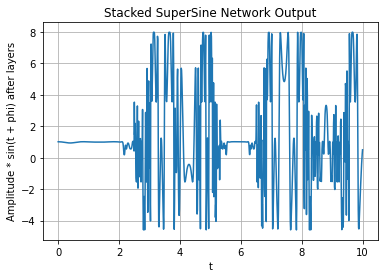

In [91]:
num_layers = 5
model = StackedSuperSineNetwork(num_layers)
model.init_rand(scale=1.5)
# Generate input values using numpy's linspace
t = np.linspace(0, 10, 1000)
t_tensor = torch.tensor(t, dtype=torch.float32)

# Get the output of the network
output = model(t_tensor).detach().numpy()

# Plotting the results
plt.plot(t, output)
plt.title("Stacked SuperSine Network Output")
plt.xlabel("t")
plt.ylabel("Amplitude * sin(t + phi) after layers")
plt.grid(True)
plt.show()

In [27]:
output.shape

(1000,)

In [ ]:
#you could also do this where it takes in the t initial every time, you would need to add a multiplier for t.  oh i like that. 
